In [ ]:
"""
for log
// if 0.6 <= p && p < 0.9 && progress > 0.2 {
//     eprintln!(
//         "m:{} {} {} {} {} {} {} {} {} {} {} {}",
//         self.input.minos[mino_is[0]].len(),
//         self.input.minos[mino_is[1]].len(),
//         self.mino_pos[mino_is[0]].0,
//         self.mino_pos[mino_is[0]].1,
//         self.mino_pos[mino_is[1]].0,
//         self.mino_pos[mino_is[1]].1,
//         next_mino_poss[0].0,
//         next_mino_poss[0].1,
//         next_mino_poss[1].0,
//         next_mino_poss[1].1,
//         mino_is[0],
//         mino_is[1],
//     );
// }
"""

In [175]:
import matplotlib.pyplot as plt
import numpy as np

In [176]:
def read_input(seed: int):
    with open(f"../tools/in/{seed:04}.txt", "r") as f:
        n, m, eps = f.readline().split()
        n, m, eps = int(n), int(m), float(eps)
        ds = []
        minos = []
        dense = 0
        for _ in range(m):
            s = f.readline().split()
            d, v = int(s[0]), list(map(int, s[1:]))
            v = [(v[2 * i], v[2 * i + 1]) for i in range(d)]
            ds.append(d)
            minos.append(v)
            dense += d
        dense /= n * n

    return n, m, eps, ds, minos, dense

In [177]:
data = []

with open("../log/c.txt", "r") as f:
    for line in f.readlines():
        if line[:2] != "m:":
            continue
        v = list(map(int, line[2:].split()))
        data.append(v)

data = np.array(data)

(array([236., 699.]), array([0., 1., 2.]), <BarContainer object of 2 artists>)

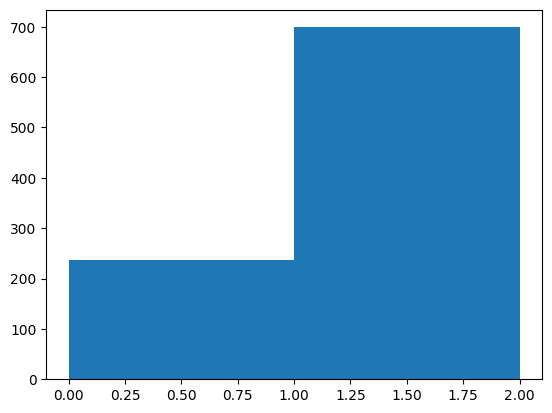

In [178]:
diff = np.abs(data[:, 0] - data[:, 1])
plt.hist(diff, bins=diff.max())

In [179]:
seed = 11
n, m, eps, ds, minos, dense = read_input(seed)

log = []

for i in range(data.shape[0]):
    before_v = set()
    after_v = set()
    cur_a, cur_b, next_a, next_b, mino_a, mino_b = data[i, 2:4], data[i, 4:6], data[i, 6:8], data[i, 8:10], data[i, 10], data[i, 11]
    for p in minos[mino_a]:
        before_v.add((p[0] + cur_a[0], p[1] + cur_a[1]))
    # for p in minos[mino_b]:
    #     before_v.add((p[0] + cur_b[0], p[1] + cur_b[1]))

    # for p in minos[mino_a]:
    #     after_v.add((p[0] + next_a[0], p[1] + next_a[1]))
    for p in minos[mino_b]:
        after_v.add((p[0] + next_b[0], p[1] + next_b[1]))

    mx_duplicate = 0
    for di in range(-5, 6):
        for dj in range(-5, 5):
            s = set(minos[mino_a])
            cnt = 0
            for p in minos[mino_b]:
                if (p[0] + di, p[1] + dj) in s:
                    cnt += 1
            mx_duplicate = max(mx_duplicate, cnt)

    log.append([len(before_v), len(after_v), len(before_v & after_v), mx_duplicate])

(array([ 37.,   0.,   6.,   0.,   0.,  58.,   3., 263.,  15., 553.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

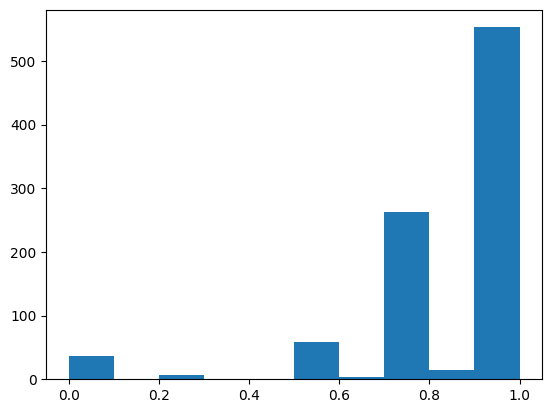

In [180]:
data = np.array(log)
plt.hist(data[:, 2] / data[:, 3])

(array([1333., 1967.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

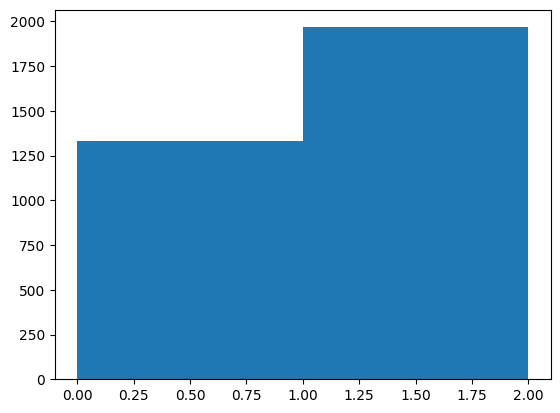

In [181]:
n, m, eps, ds, minos, dense = read_input(seed)

import random
rnd = random.Random(0)

data = []

for _ in range(3300):
    i, j = rnd.randrange(0, len(ds)), rnd.randrange(0, len(ds))
    data.append(abs(ds[i] - ds[j]))

data = np.array(data)

plt.hist(data, bins=data.max())